# 03-decision-trees-and-random-forests


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from ucimlrepo import fetch_ucirepo 

___ 
## 1. Business Understanding

Problem: 
 - Can we predict, is a website a phishing-site or not with the given data.

Objective:
 - Build a simple and interpretable decision tree.
 - And build a random forest.
 

___ 
## 2. Data Understanding

Fetching the dataset.

In [2]:
# fetch the dataset 
phishing_websites = fetch_ucirepo(id=327) 

df = phishing_websites.data.original

df

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [3]:
df.info()
df.describe()
df['result'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   having_ip_address           11055 non-null  int64
 1   url_length                  11055 non-null  int64
 2   shortining_service          11055 non-null  int64
 3   having_at_symbol            11055 non-null  int64
 4   double_slash_redirecting    11055 non-null  int64
 5   prefix_suffix               11055 non-null  int64
 6   having_sub_domain           11055 non-null  int64
 7   sslfinal_state              11055 non-null  int64
 8   domain_registration_length  11055 non-null  int64
 9   favicon                     11055 non-null  int64
 10  port                        11055 non-null  int64
 11  https_token                 11055 non-null  int64
 12  request_url                 11055 non-null  int64
 13  url_of_anchor               11055 non-null  int64
 14  links_

result
 1    6157
-1    4898
Name: count, dtype: int64

11055 rows with 31 columns of data.

With the given data the result column shows that with value 1 is legitimate, and -1 is a phishing site.


|Value   |Legitimacy    |
|:-|:-|
| 1  | legitimate|
| -1 | phishing |


___ 
## 3. Data Preparation


Splitting the data to 2 sets, one containing everything except the ``'result'``, and the other one containing only the ``'result'`` columns. For training the data.

In [4]:
X = df.drop(columns={'result'})
Y = df['result']

___ 
## 4.1 Modeling (Decision Tree)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7738, 30) (3317, 30) (7738,) (3317,)


In [6]:
decision_tree_model = DecisionTreeClassifier(max_depth=3,ccp_alpha=0.012, random_state=20)
decision_tree_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",20
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

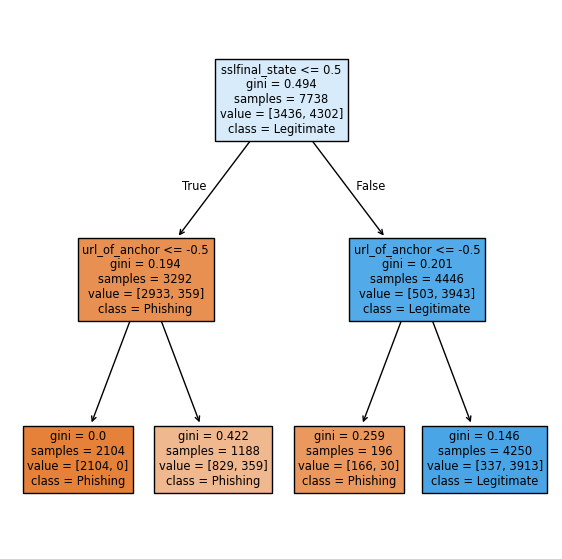

In [7]:
fig = plt.figure(figsize = (7, 7))
plot_tree(decision_tree_model, feature_names = X.keys(), class_names = ['Phishing', 'Legitimate'], filled=True)
plt.show()

In [8]:
decision_tree_preds = decision_tree_model.predict(X_test)


In [9]:
decision_tree_accuracy = accuracy_score(y_test,decision_tree_preds)
print("Decision Tree accuracy: ", decision_tree_accuracy)

Decision Tree accuracy:  0.9065420560747663


In [10]:
decision_tree_cm = confusion_matrix(y_test, decision_tree_preds)
print(decision_tree_cm)

[[1326  136]
 [ 174 1681]]


<Figure size 200x200 with 0 Axes>

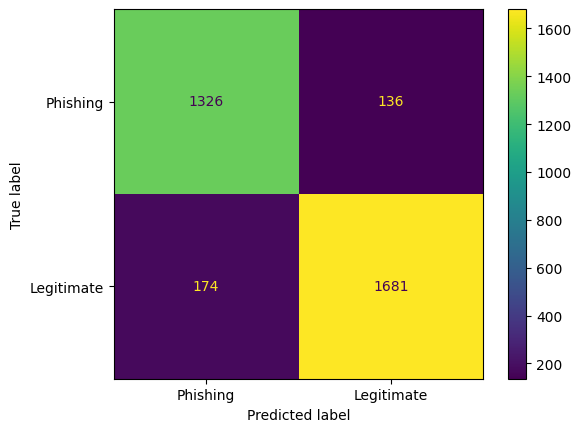

In [11]:
plt.figure(figsize=(2, 2))
disp = ConfusionMatrixDisplay(
    confusion_matrix=decision_tree_cm,
    display_labels=['Phishing', 'Legitimate']
)
disp.plot()
plt.show()


In [12]:
print(classification_report(y_test, decision_tree_preds))

              precision    recall  f1-score   support

          -1       0.88      0.91      0.90      1462
           1       0.93      0.91      0.92      1855

    accuracy                           0.91      3317
   macro avg       0.90      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317



## 4.2 Modeling (Random Forest)

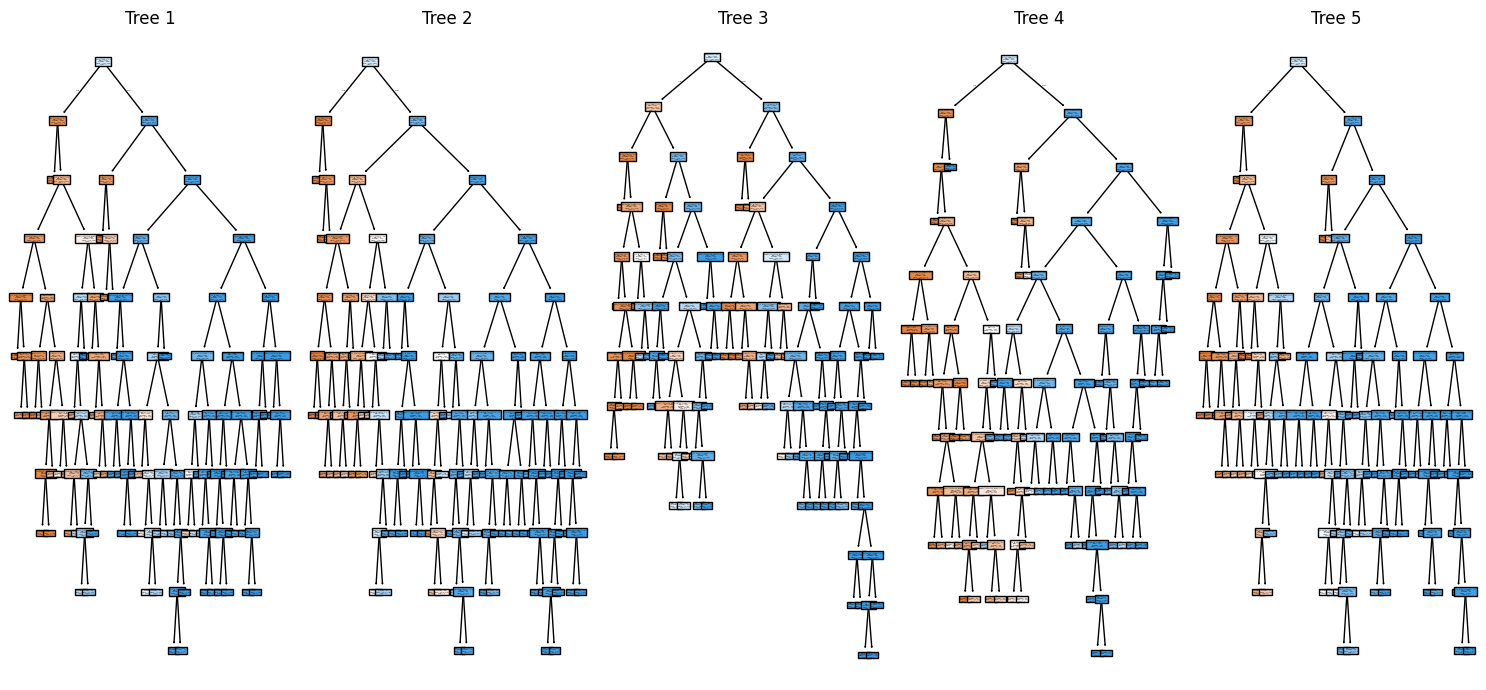

In [13]:
model = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    max_samples=0.7,
    max_features=0.75,
    min_samples_leaf=30,
    random_state=123)
model.fit(X, Y)

n_trees_to_plot = 5

plt.figure(figsize=(15, 7))

for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)
    plot_tree(model.estimators_[i], filled=True,
              feature_names=X.keys(), class_names=['-1', '1'])
    plt.title(f'Tree {i + 1}')

plt.tight_layout()
plt.show()


Random Forest accuracy: 0.9472414832680133
Confusion Matrix:
 [[1372   90]
 [  85 1770]]
Classification Report:
               precision    recall  f1-score   support

          -1       0.94      0.94      0.94      1462
           1       0.95      0.95      0.95      1855

    accuracy                           0.95      3317
   macro avg       0.95      0.95      0.95      3317
weighted avg       0.95      0.95      0.95      3317



<Figure size 150x150 with 0 Axes>

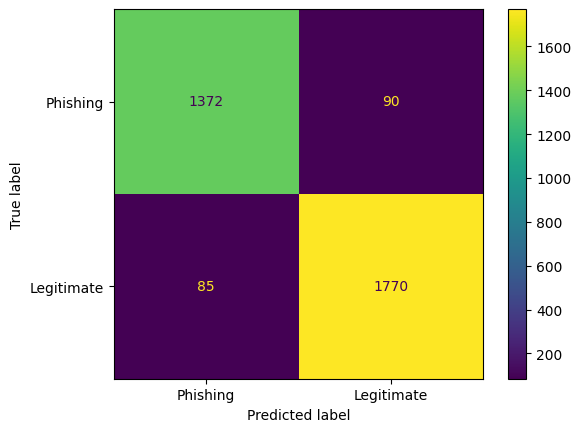

In [14]:
rf_preds = model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest accuracy:", rf_accuracy)

rf_cm = confusion_matrix(y_test, rf_preds)
print("Confusion Matrix:\n", rf_cm)

print("Classification Report:\n", classification_report(y_test, rf_preds))


disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Phishing', 'Legitimate'])
plt.figure(figsize=(1.5, 1.5))
disp_rf.plot()
plt.show()

___ 
## 5. Evaluation



Decision Tree:

 - Accuracy: okay for a small tree.

 - Catches most phishing sites, some mistakes.

Random Forest:

 - Accuracy: better than single tree.

 - Fewer mistakes, good for automatic detection.

___ 
## 6. Deployment

Manual Instructions to Decide if a Website is Phishing:

Some website features can indicate phishing. Follow these steps:

1. Check SSLfinal_State (measures SSL certificate quality):

 - If ≤ 0.5 → Phishing

2. If not, check URL_of_Anchor (checks if links point to suspicious sites):

 - If ≤ -0.5 → Phishing

 - Else → Legitimate